
A Confirmation that all columns and cells are completely filled,there are no empty cells and data is in exact type :

feature_name                                numbe_of_missing_values
LSOAcode2011                                             0
LSOAname                                                 0
YearendingDec1995                                        0
YearendingDec1996                                        0
YearendingDec1997                                        0
YearendingDec1998                                        0
YearendingDec1999                                        0
YearendingDec2000                                        0
YearendingDec2001                                        0
YearendingDec2002                                        0
YearendingDec2003                                        0
YearendingDec2004                                        0
YearendingDec2005                                        0
YearendingDec2006                             

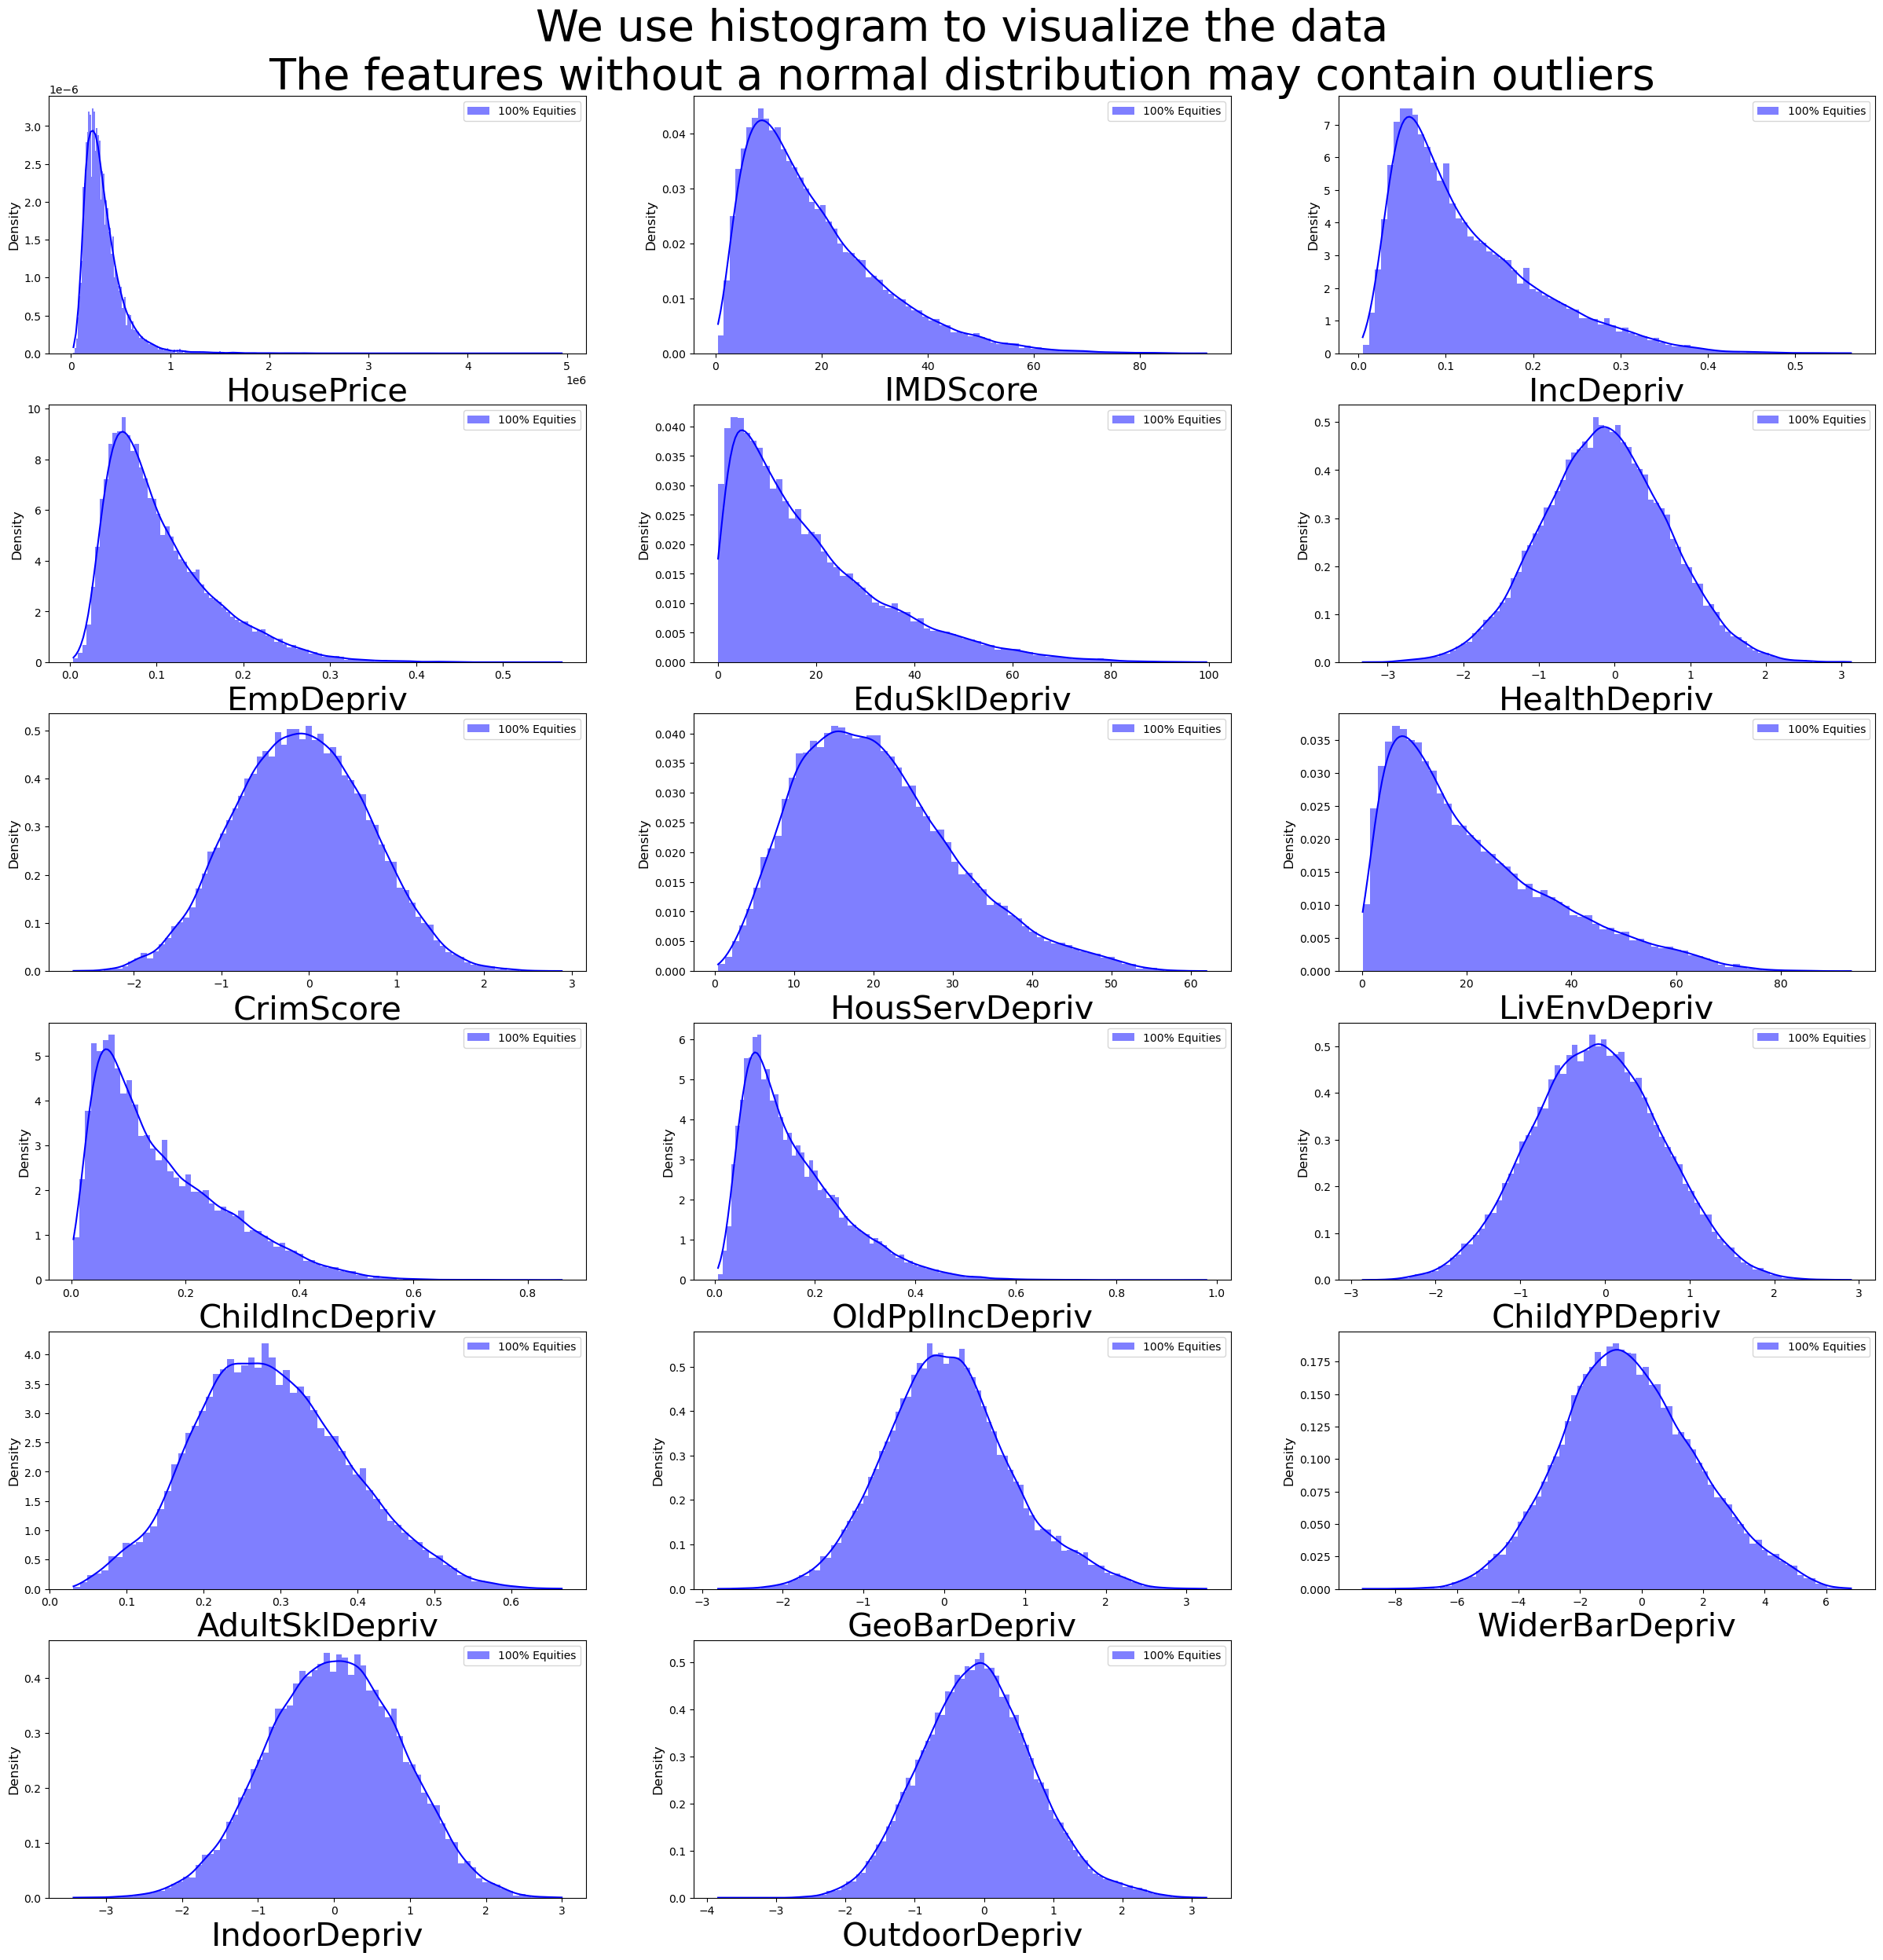

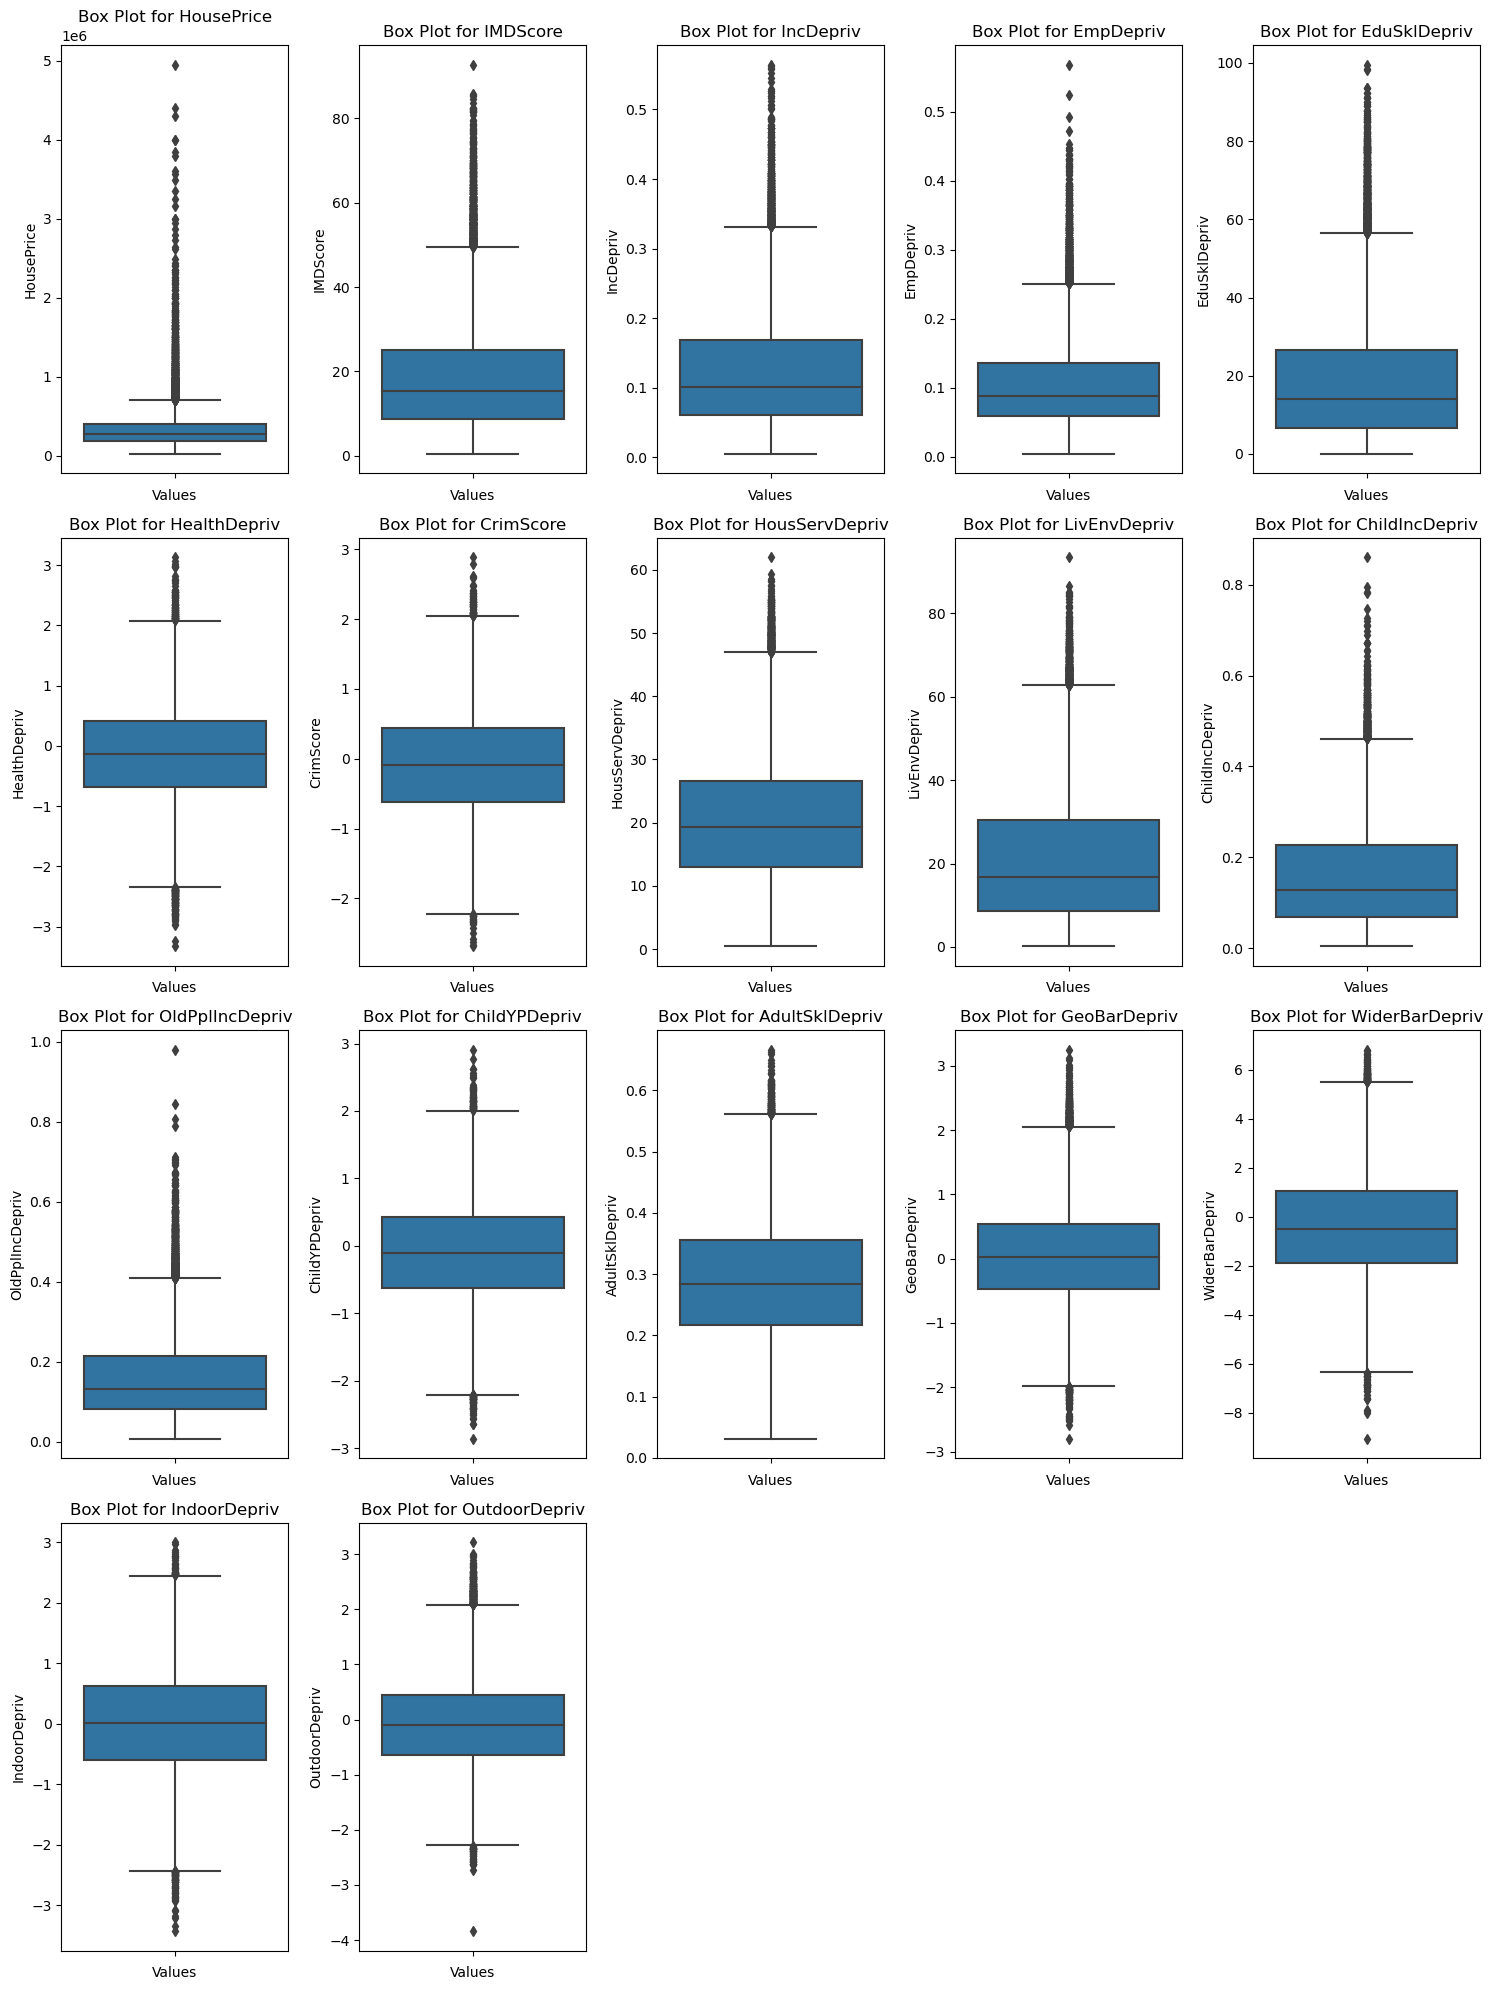

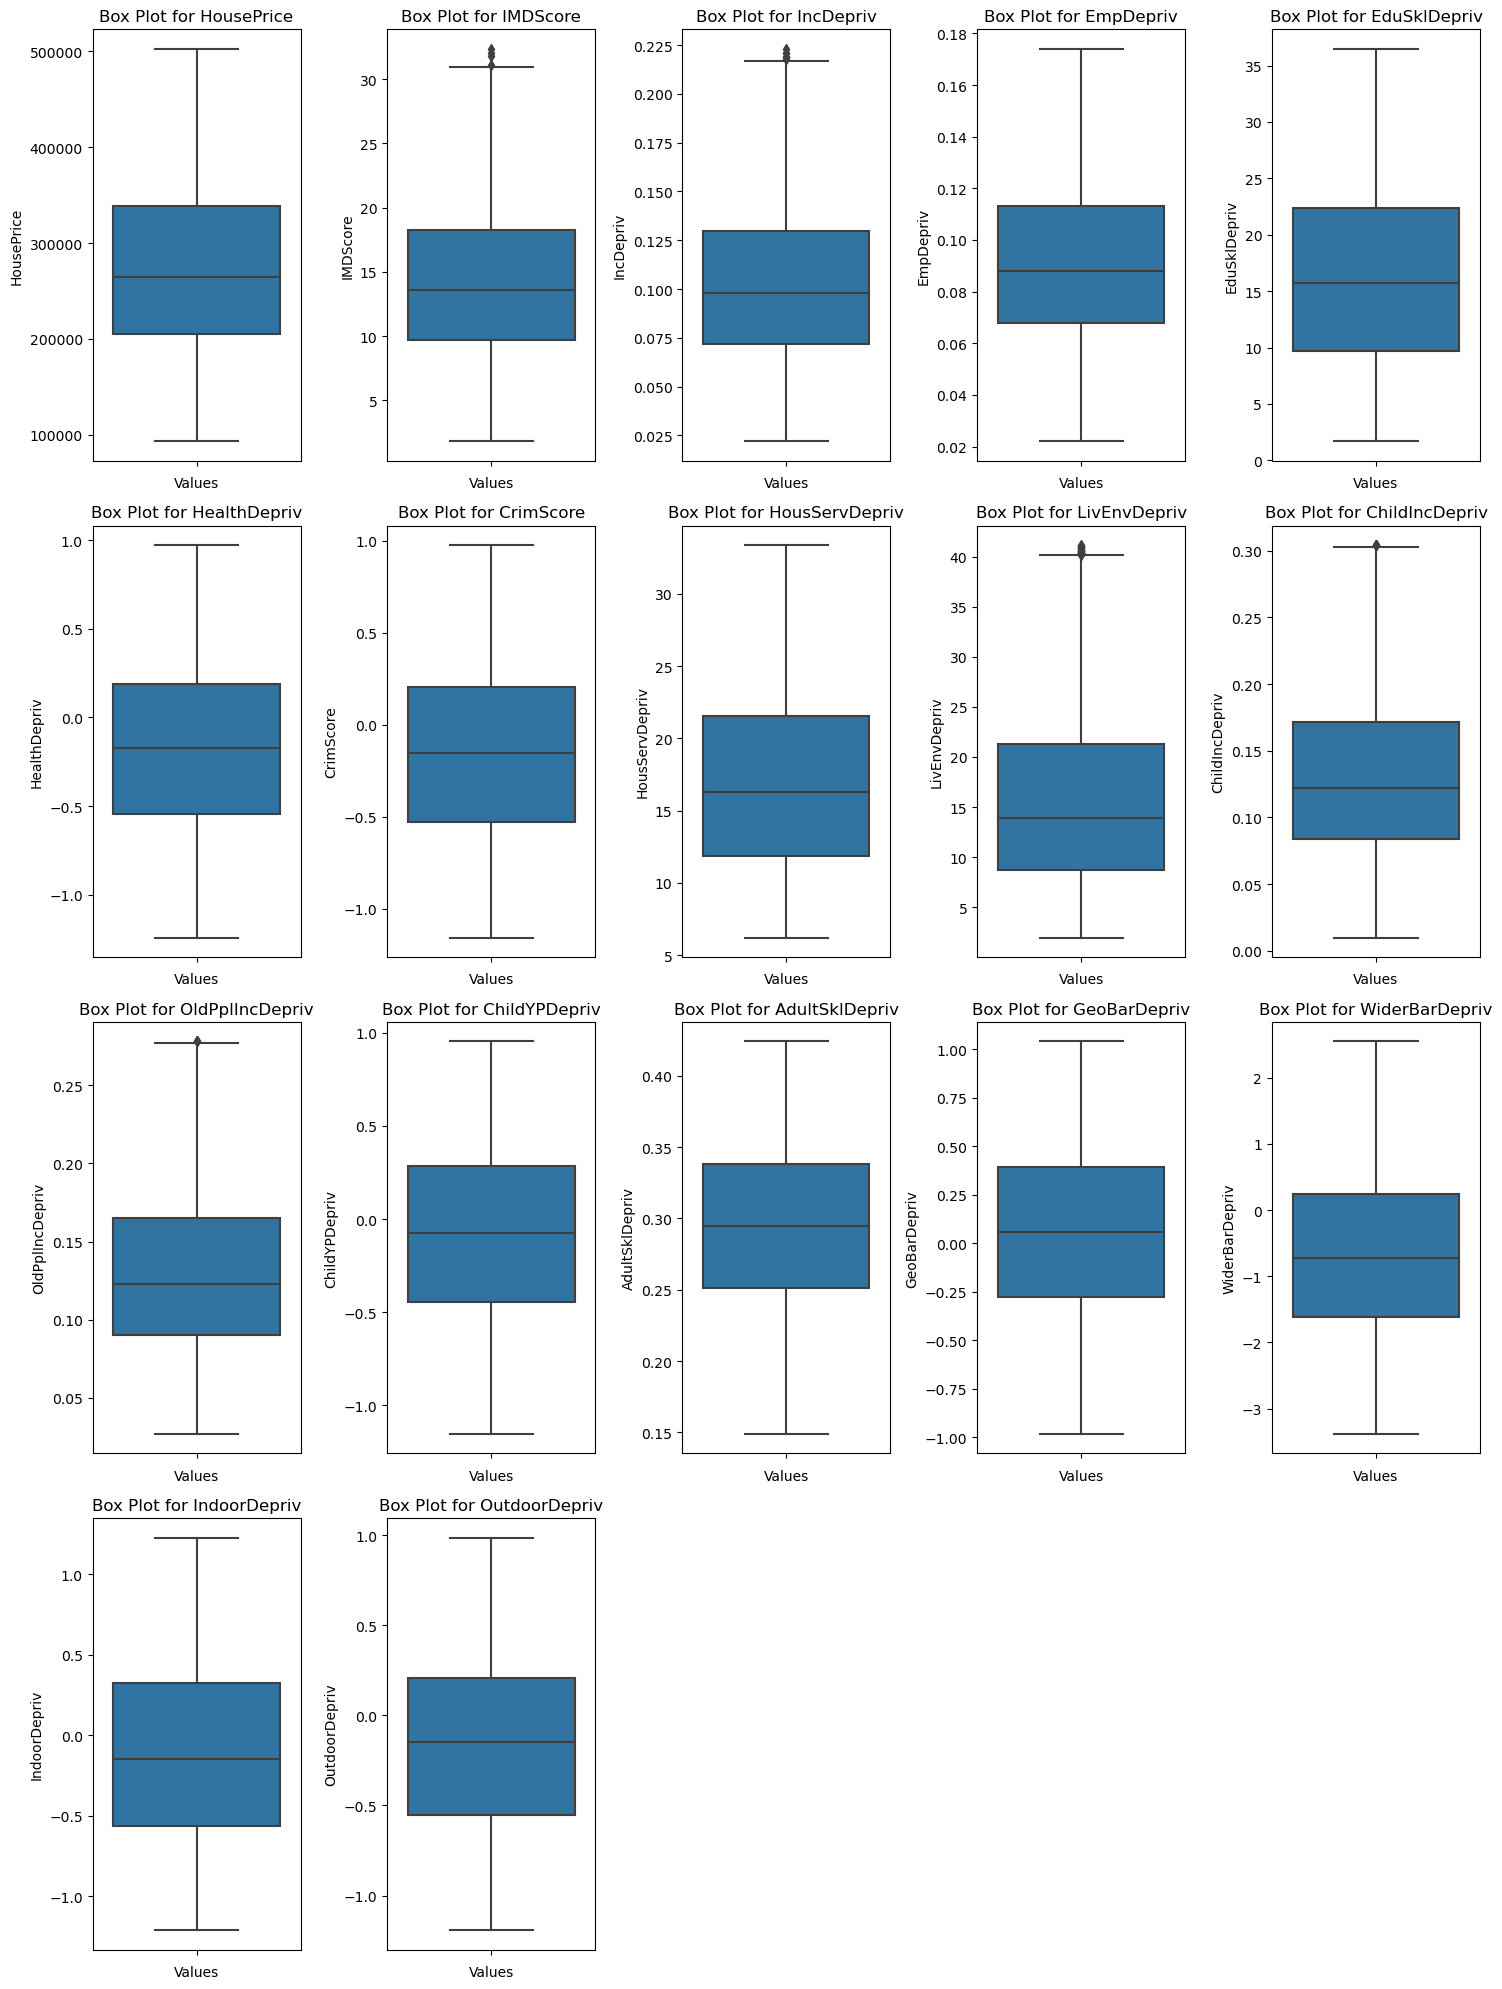

finished preprocessing.....


In [2]:
#Run preprocessing Notebook
#To see the sets in preprocessing please view preprocessing notebook
%run HPP_Preprocessing.ipynb
#The variables we would use from this notebook are featuresNormalized (contains all features normalized) & dfp (normalized dataframe)

# Building the Gradient boost using the default hyperparameters

In [42]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# Your independent columns and target column
#independent_columns =['HealthDepriv_n','OutdoorDepriv_n','AdultSklDepriv_n','WiderBarDepriv_n'] 
#independent_columns = ['IMDScore', 'IncDepriv', 'EmpDepriv', 'EduSklDepriv', 'HealthDepriv', 'CrimScore', 'HousServDepriv', 'LivEnvDepriv', 'ChildIncDepriv', 'OldPplIncDepriv', 'ChildYPDepriv', 'AdultSklDepriv', 'GeoBarDepriv', 'WiderBarDepriv', 'IndoorDepriv', 'OutdoorDepriv']
independent_columns = ['EmpDepriv', 'EduSklDepriv', 'HealthDepriv', 'CrimScore', 'HousServDepriv', 'OldPplIncDepriv', 'ChildYPDepriv', 'AdultSklDepriv', 'GeoBarDepriv', 'WiderBarDepriv', 'IndoorDepriv', 'OutdoorDepriv']
target_column = 'HousePrice'

# Feature matrix (X) and target vector (y)
X = dfp[independent_columns]
y = dfp[target_column]

# Split data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Gradient Boosting Regressor with default parameters
regressor = GradientBoostingRegressor(random_state=42)

# Train the model on the training data
regressor.fit(X_train, y_train)

# Predict using the trained model on the test data
y_pred = regressor.predict(X_test)


# Evaluating the Random forest tree (the default hyperparameters)- Overfitting detected

In [43]:
from sklearn.metrics import mean_squared_error, r2_score
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

import numpy as np
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Overfitting spotted Train- accuracy of 1 indicates overfitted model
print (f'Train Accuracy - : {regressor.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {regressor.score(X_test,y_test):.3f}')

Mean Squared Error: 4264381785.5484834
Mean Absolute Error: 51852.66633260278
R-squared: 0.48858450268618203
Root Mean Squared Error: 65302.23415434179
Train Accuracy - : 0.564
Test Accuracy - : 0.489


# Checking feature importance of decision tree (with default hyperparameters)

In [39]:
# Get the feature importance scores
feature_importance = regressor.feature_importances_

# Create a DataFrame to display the results
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the DataFrame in descending order of importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance_df)


            Feature  Importance
0    HealthDepriv_n    0.668439
3  WiderBarDepriv_n    0.214693
2  AdultSklDepriv_n    0.075181
1   OutdoorDepriv_n    0.041687


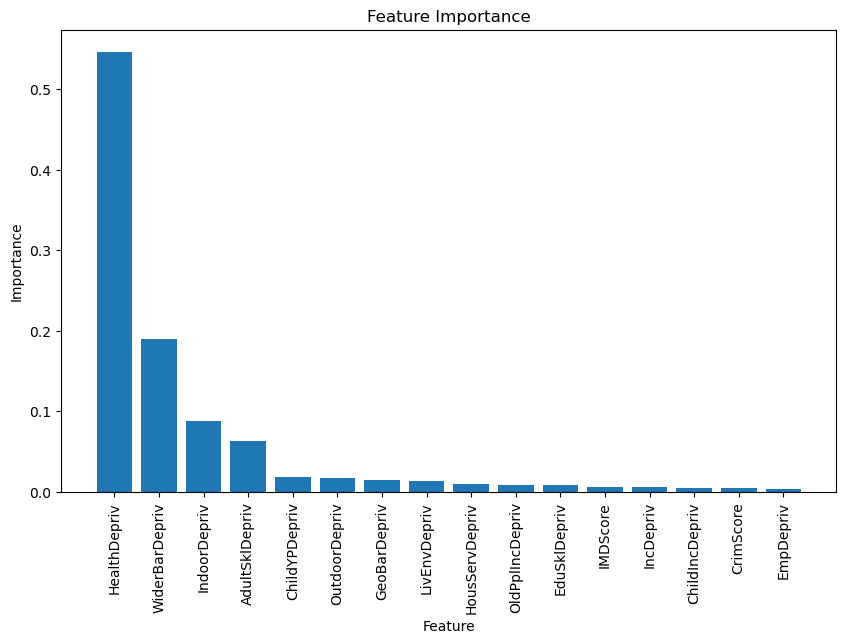

In [11]:
import matplotlib.pyplot as plt

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()


# Building the Gradient boost  (hyperparameter tuned)

In [14]:
# Hyperparameter tuning using randomizedSearchCv
# Hyperparameters to be randomly tested
parameters = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 9, 10],
    'subsample': [0.8, 0.9, 1.0],
    'loss': ['absolute_error', 'squared_error', 'quantile', 'huber']
}

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
# Create a GradientBoostingRegressor model
GBR_model = GradientBoostingRegressor(random_state=42)
# Initialize RandomizedSearchCV
GBR_grid = RandomizedSearchCV(GBR_model, param_distributions=parameters, cv=5, verbose=2, random_state=42)
#Fitting the raandom hyperparameters into  RandomizedSearchCV class
GBR_grid.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END learning_rate=0.3, loss=huber, max_depth=3, n_estimators=100, subsample=0.9; total time=   3.3s
[CV] END learning_rate=0.3, loss=huber, max_depth=3, n_estimators=100, subsample=0.9; total time=   3.3s
[CV] END learning_rate=0.3, loss=huber, max_depth=3, n_estimators=100, subsample=0.9; total time=   3.4s
[CV] END learning_rate=0.3, loss=huber, max_depth=3, n_estimators=100, subsample=0.9; total time=   3.3s
[CV] END learning_rate=0.3, loss=huber, max_depth=3, n_estimators=100, subsample=0.9; total time=   3.3s
[CV] END learning_rate=0.2, loss=huber, max_depth=7, n_estimators=200, subsample=1.0; total time=  19.6s
[CV] END learning_rate=0.2, loss=huber, max_depth=7, n_estimators=200, subsample=1.0; total time=  20.5s
[CV] END learning_rate=0.2, loss=huber, max_depth=7, n_estimators=200, subsample=1.0; total time=  20.6s
[CV] END learning_rate=0.2, loss=huber, max_depth=7, n_estimators=200, subsample=1.0; total time=  

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'loss': ['absolute_error',
                                                 'squared_error', 'quantile',
                                                 'huber'],
                                        'max_depth': [3, 5, 7, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, verbose=2)

In [15]:
#Now checking the best estimator
best_estimator = GBR_grid.best_estimator_
#Now checking the best accuracy score
best_accuracy = GBR_grid.best_score_

In [16]:
print(best_estimator)
print(best_accuracy)

GradientBoostingRegressor(loss='absolute_error', max_depth=7, random_state=42,
                          subsample=0.8)
0.4855316442118559


In [17]:
best_estimator.n_estimators

100

In [49]:
# Access all parameter combinations and their respective results
#results = DT_grid.cv_results_
#print(results)

# Building Gradient Boost models (hyperparameter tuned)

In [44]:
#Model 1
regressor1 = GradientBoostingRegressor(loss='absolute_error', max_depth=7, random_state=42, subsample=0.8, n_estimators=100)
#Fit Model 1
regressor1.fit(X_train,y_train)

models = [regressor1]

# Now lets look at the accuracy of the model

In [45]:
modelNumber = 1
for model in models:
    print("For model "+str(modelNumber))
    print (f'Train Accuracy - : {model.score(X_train,y_train):.3f}')
    print (f'Test Accuracy - : {model.score(X_test,y_test):.3f}')
    print("----------------------------------------")
    modelNumber += 1

For model 1
Train Accuracy - : 0.702
Test Accuracy - : 0.489
----------------------------------------


# Now lets look at the MSE & R-Squared Value for the model

In [46]:
from sklearn.metrics import mean_squared_error, r2_score

modelNumber = 1
for model in models:
    print("For model "+str(modelNumber))
    # Predict using the trained model 2 on the test data
    y_pred = model.predict(X_test)
    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    # Calculate R-squared
    r2 = r2_score(y_test, y_pred)
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)
    print("----------------------------------------")
    modelNumber += 1

For model 1
Mean Squared Error: 4261411325.134249
R-squared: 0.4889407417769559
----------------------------------------


# The feature importance score and visualization for model 1

            Feature  Importance
2      HealthDepriv    0.222772
9    WiderBarDepriv    0.113152
10     IndoorDepriv    0.111869
7    AdultSklDepriv    0.086636
11    OutdoorDepriv    0.075747
3         CrimScore    0.063449
6     ChildYPDepriv    0.057508
4    HousServDepriv    0.056311
8      GeoBarDepriv    0.055468
0         EmpDepriv    0.055223
5   OldPplIncDepriv    0.051530
1      EduSklDepriv    0.050334


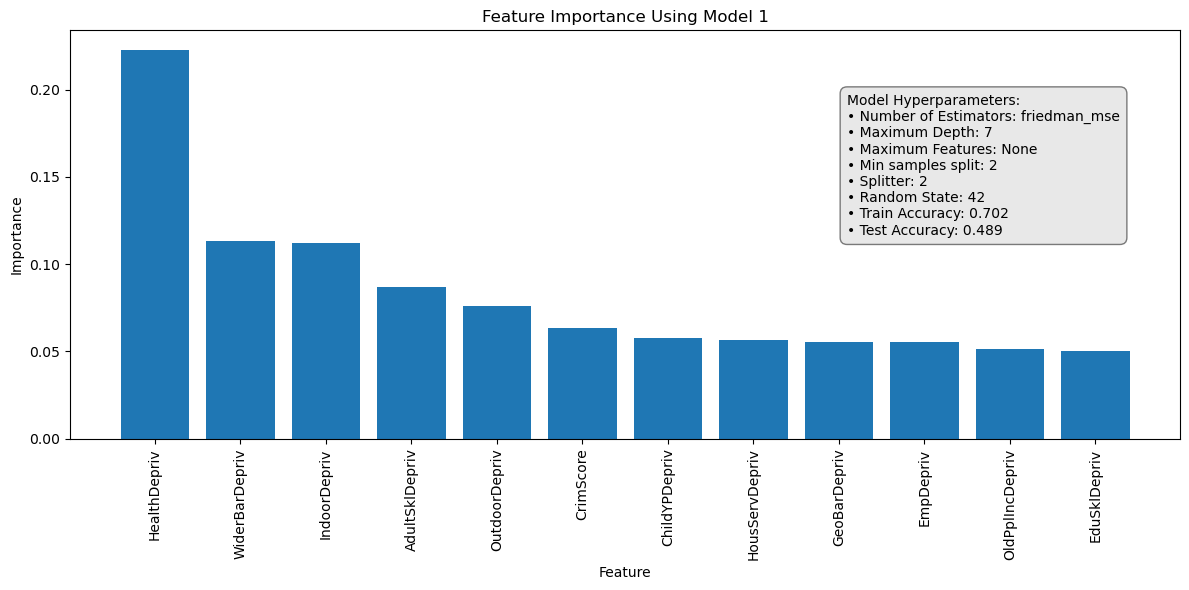

In [47]:
# Get the feature importance scores for model 1
modelIndex = 0
feature_importance = models[modelIndex].feature_importances_

# Create a DataFrame to display the results
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the DataFrame in descending order of importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance_df)

# Placeholder for model hyperparameters used
model_hyperparameters = {
    'criterion': models[modelIndex].criterion,
    'max_depth': models[modelIndex].max_depth,
    'max_features': models[modelIndex].max_features,
    'min_samples_split': models[modelIndex].min_samples_split,
    'splitter': models[modelIndex].min_samples_split,
    'random_state': models[modelIndex].random_state,
    'train_accuracy' : round(models[modelIndex].score(X_train,y_train),3),
    'test_accuracy': round(models[modelIndex].score(X_test,y_test),3)
    # Add more hyperparameters if needed
}


# Plot the feature importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Using Model '+str(modelIndex+1))
plt.xticks(rotation=90)

# Adding bullet points for model hyperparameters on the right side of the plot
bullet_points = [
    f"Model Hyperparameters:",
    f"• Number of Estimators: {model_hyperparameters['criterion']}",
    f"• Maximum Depth: {model_hyperparameters['max_depth']}",
    f"• Maximum Features: {model_hyperparameters['max_features']}",
    f"• Min samples split: {model_hyperparameters['min_samples_split']}",
    f"• Splitter: {model_hyperparameters['splitter']}",
    f"• Random State: {model_hyperparameters['random_state']}",
    f"• Train Accuracy: {model_hyperparameters['train_accuracy']}",
    f"• Test Accuracy: {model_hyperparameters['test_accuracy']}",
    
    # Add more hyperparameters if needed
]


# Display the bullet points
plt.text(0.7, 0.5, "\n".join(bullet_points), transform=plt.gca().transAxes,
         bbox=dict(facecolor='lightgray', alpha=0.5, boxstyle='round,pad=0.5'))

plt.tight_layout()
plt.show()
